In [3]:
from itertools import permutations
import random
import math
import matplotlib.pyplot as plt


In [4]:
A = [('a1',9), ('a2',6), ('a3',3), ('a4',8), ('a5',5)]

B = [('b1',5), ('b2',7), ('b3',2), ('b4',10)]

In [5]:
jobs = A + B

In [6]:
def genera_soluzione_iniziale(jobs):
    permutazioni = list(permutations(jobs))
    
    i = random.randint(0, len(permutazioni)-1)
    soluzione_inziale = list(permutazioni[i])

    return soluzione_inziale

In [16]:
def permutazioni_con_scambio_limitato(sequenza):
    tutte_combinazioni_due_elementi = list(permutations(sequenza, 2))
    permutazioni_con_scambio = []

    for combinazione in tutte_combinazioni_due_elementi:
        indice1 = sequenza.index(combinazione[0])
        indice2 = sequenza.index(combinazione[1])

        # Scambia al massimo due elementi
        sequenza_copy = sequenza.copy()
        sequenza_copy[indice1], sequenza_copy[indice2] = sequenza_copy[indice2], sequenza_copy[indice1]

        permutazioni_con_scambio.append(sequenza_copy)

    return permutazioni_con_scambio

In [7]:
def vicinato(sequenza):
    tutte_combinazioni_due_elementi = list(permutations(sequenza, 2))
    permutazioni_con_scambio = []

    for combinazione in tutte_combinazioni_due_elementi:
        indice1 = sequenza.index(combinazione[0])
        indice2 = sequenza.index(combinazione[1])

        # Scambia al massimo due elementi
        sequenza_copy = sequenza.copy()
        sequenza_copy[indice1], sequenza_copy[indice2] = sequenza_copy[indice2], sequenza_copy[indice1]

        permutazioni_con_scambio.append(sequenza_copy)

    return permutazioni_con_scambio

In [8]:
def energia(soluzione, alfa):
    somma_A = 0
    somma_B = 0
    somma_tot = 0
    for job in soluzione:
        string = str(job[0])
        somma_tot += job[1]
        if string.startswith('a'):
            somma_A += somma_tot
        else:
            somma_B += somma_tot
    
    return (alfa * (somma_A + somma_B)) + ((1-alfa) * abs((somma_A - somma_B)))
        


In [9]:
def genera_temperatura_iniziale(soluzione, alfa):
    vicini = vicinato(soluzione)
    j = random.randint(0, len(vicini)-1)
    y = vicini[j]

    return abs(energia(soluzione, alfa) - energia(y, alfa))

In [22]:
def simulated_annealing(jobs):
    x = genera_soluzione_iniziale(jobs)
    ottimo = x
    alfa = 0.5
    beta = 0.98
    temperatura = genera_temperatura_iniziale(x, alfa)
    L = len(vicinato(x))

    iterazioni, valori_ottimi = list(), list() 

    for i in range(10000):
        for _ in range(L):
            vicini = vicinato(x)
            j = random.randint(0, len(vicini)-1)
            y = vicini[j]

            delta = energia(y, alfa) - energia(x, alfa)

            if delta < 0:
                x = y
            elif math.exp(-delta / temperatura) > random.random():
                x = y

        ottimo = x

        iterazioni.append(i)
        valori_ottimi.append(energia(ottimo,alfa))
        
        # print('Soluzione ottima: ' + str(ottimo) + ', Energia: ' + str(energia(ottimo, alfa)))
        
        if(i % 100 == 0):
            L += 1
        
        temperatura = beta * temperatura

    plt.plot(iterazioni, valori_ottimi)
    plt.xlabel('Iterazioni')
    plt.ylabel('Valore della funzione obiettivo')
    plt.title('Convergenza di Simulated Annealing')
    plt.show()    
    
    return ottimo
        


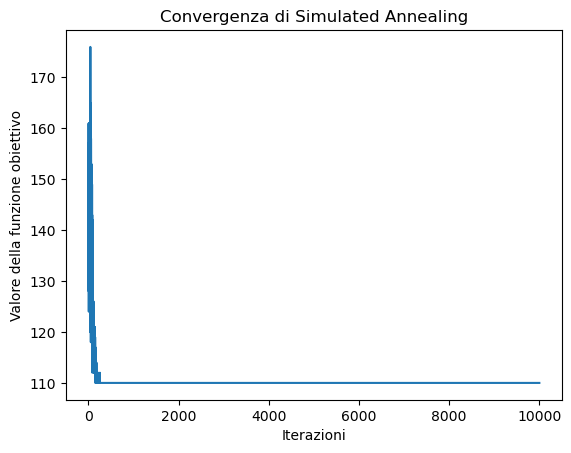

In [23]:
soluzione_ottima = simulated_annealing(jobs)

In [21]:
soluzione_ottima

[('a3', 3),
 ('b3', 2),
 ('a5', 5),
 ('a2', 6),
 ('b1', 5),
 ('b2', 7),
 ('a4', 8),
 ('a1', 9),
 ('b4', 10)]

In [17]:
def energia_modificata(soluzione):
    somma_A = 0
    somma_B = 0
    somma_tot = 0
    for job in soluzione:
        string = str(job[0])
        somma_tot += job[1]
        print(somma_tot)
        if string.startswith('a'):
            somma_A += somma_tot
        else:
            somma_B += somma_tot
    
    return (somma_A + somma_B) 

In [18]:
valore = energia_modificata(soluzione_ottima)
valore

2
5
10
15
21
29
36
45
55


218